In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
adv_works = pd.read_csv('AdvWorksCusts.csv')
adv_month_spend = pd.read_csv('AW_AveMonthSpend.csv')
bike_buyer= pd.read_csv('AW_BikeBuyer.csv')
merged_df1=pd.merge(adv_works, adv_month_spend, how="left", on='CustomerID')
merged_df=pd.merge(merged_df1, bike_buyer, how="left", on='CustomerID')
#merged_df=pd.merge(merged_df2, income_year, how="left", on='CustomerID')
test_data= pd.read_csv('AW_test.csv')

merged_df.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')

In [7]:
test_data.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


In [11]:
merged_final=merged_df.drop(['Title','FirstName','MiddleName','LastName','Suffix',
                        'AddressLine1','AddressLine2','StateProvinceName',
       'CountryRegionName', 'PostalCode','AveMonthSpend', 'PhoneNumber'], axis=1)


test=test_data.drop(['Title','FirstName','MiddleName','LastName','Suffix',
                        'AddressLine1','AddressLine2','StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber'], axis=1)

## EXPLORATION ANALYSIS

In [12]:
merged_final.head()

,CustomerID,City,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
0,11000,Rockhampton,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,0
1,11001,Seaford,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,1
2,11002,Hobart,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,0
3,11003,North Ryde,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,0
4,11004,Wollongong,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,1


In [13]:
merged_final.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
count,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000
mean,20200.378523,0.672671,1.508106,0.997211,2.016096,78084.818700,0.331513
std,5354.643340,0.469252,1.137949,1.519436,1.685089,39616.621179,0.470771
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,0.000000
25%,15531.000000,0.000000,1.000000,0.000000,0.000000,47773.000000,0.000000
50%,20157.000000,1.000000,2.000000,0.000000,2.000000,76090.000000,0.000000
75%,24850.000000,1.000000,2.000000,2.000000,3.000000,105065.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,1.000000


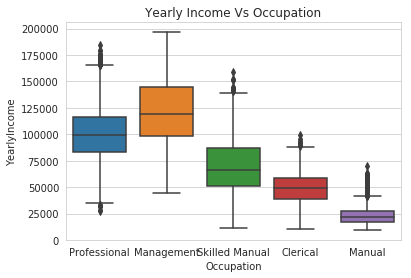

In [14]:

def plot_box(merged_final, col, col_y = 'YearlyIncome'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=merged_final)
    plt.title("Yearly Income Vs Occupation")
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(merged_final, 'Occupation')    

Text(0.5,1,'Marital Status Vs Bikebuyer')

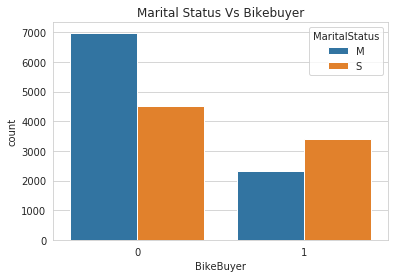

In [15]:
sns.countplot(x='BikeBuyer', hue='MaritalStatus', data=merged_final)
plt.title("Marital Status Vs Bikebuyer")


Text(0.5,1,'Occupations Vs BikeBuyer')

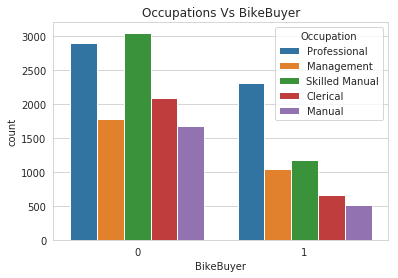

In [16]:
sns.countplot(x='BikeBuyer', hue='Occupation', data=merged_final)
plt.title("Occupations Vs BikeBuyer")


Text(0.5,1,'Gender vs Bike Owner')

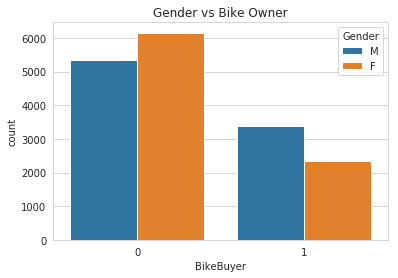

In [17]:
sns.countplot(x='BikeBuyer', hue='Gender', data=merged_final)
plt.title("Gender vs Bike Owner")

#plt.show()


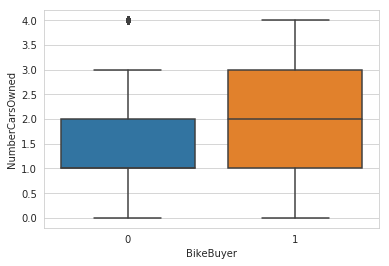

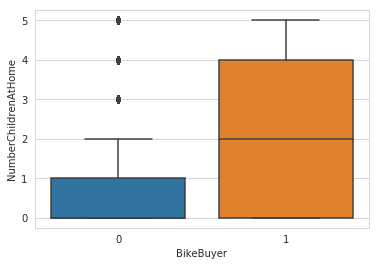

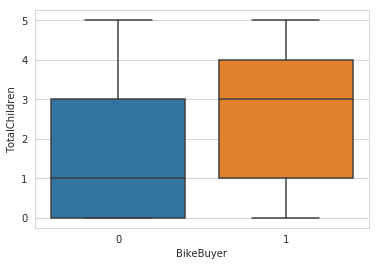

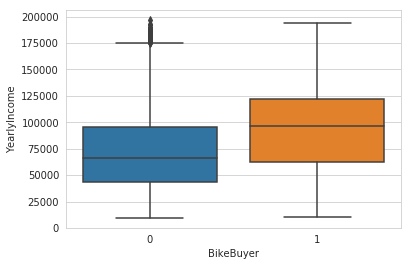

In [18]:
def plot_box(merged_final, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=merged_final)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome']
plot_box(merged_final, num_cols)

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


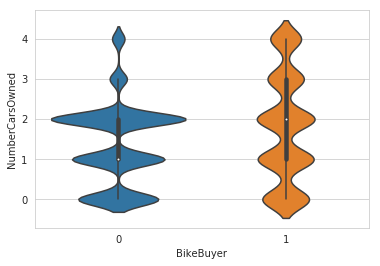

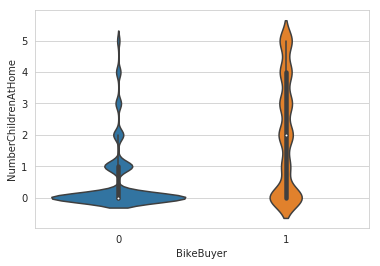

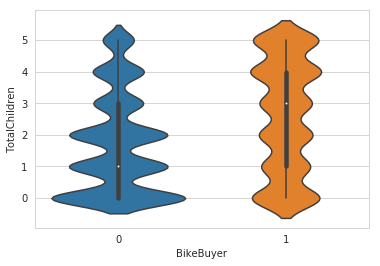

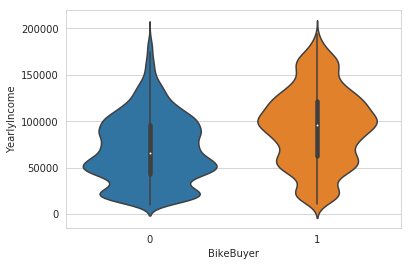

In [19]:
def plot_violin(merged_final, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=merged_final)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(merged_final, num_cols)

Education


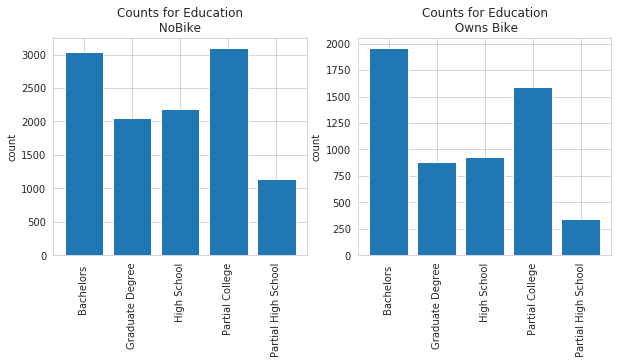

Occupation


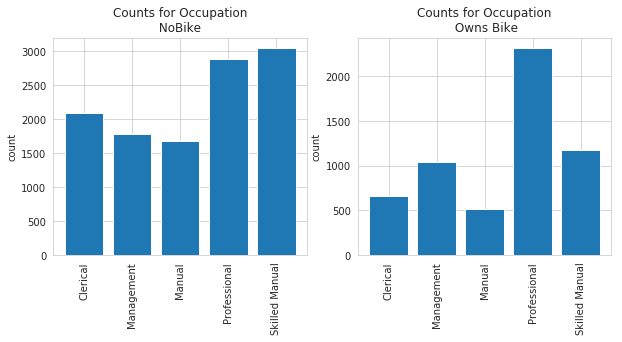

Gender


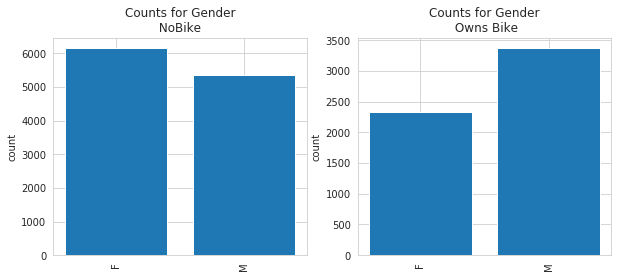

MaritalStatus


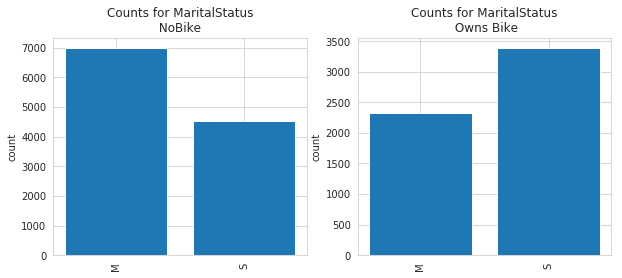

HomeOwnerFlag


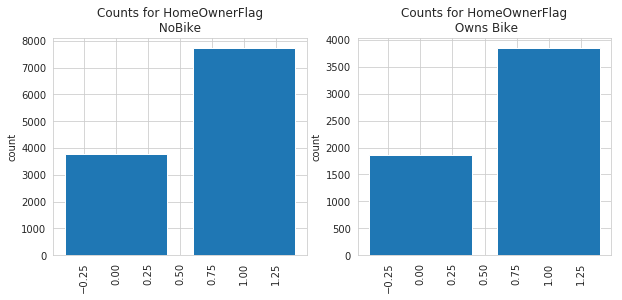

In [20]:
import numpy as np
cat_cols = ['Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag']

merged_final['dummy'] = np.ones(shape = merged_final.shape[0])
for col in cat_cols:
    print(col)
    counts = merged_final[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n NoBike ')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Owns Bike')
    plt.ylabel('count')
    plt.show()

### CLASSIFICATION PROBLEM

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

In [24]:
labels = np.array(merged_final['BikeBuyer'])


In [25]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education','Gender',
       'MaritalStatus', 'HomeOwnerFlag']

Features = encode_string(merged_final['Occupation'])
for col in categorical_columns:
    temp = encode_string(merged_final[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :]) 




(17209, 16)
[[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.]]


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [26]:
merged_final['Occupation'].value_counts()

Professional      5209
Skilled Manual    4227
Management        2830
Clerical          2751
Manual            2192
Name: Occupation, dtype: int64

Next the numeric features must be concatenated to the numpy array by executing the code in the cell below. 

In [27]:
Features = np.concatenate([Features, np.array(merged_final[['NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome']])], axis = 1)
print(Features.shape)
print(Features[:2, :])   


(17209, 20)
[[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  2.00000e+00 1.37947e+05]
 [0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 3.00000e+00
  3.00000e+00 1.01141e+05]]


In [28]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

With the dummy variables the original 4 categorical features are now 16 dummy variables. With the 4 numeric features there are a total of 20. 

we split the data into training and test data sets. This step is critical. If machine learning models are tested on the training data, the results will be both biased and overly optimistic.

The code in the cell below performs the following processing:
1. An index vector is Bernoulli sampled using the `train_test_split` function from the `model_selection` package of scikit-learn. 
2. The first column of the resulting index array contains the indices of the samples for the training cases. 
3. The second column of the resulting index array contains the indices of the samples for the test cases. 

In [29]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [30]:
scaler = preprocessing.StandardScaler().fit(X_train[:,19:])
X_train[:,19:] = scaler.transform(X_train[:,19:])
X_test[:,19:] = scaler.transform(X_test[:,19:])
X_train[:2,]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 2.        , 0.        , 2.        , 0.07794072],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 2.        , 0.        , 4.        , 0.78384066]])

The five numeric features are now scaled. 

## Construct the logistic regression model

Now, it is time to compute the logistic regression model. The code in the cell below does the following:
1. Define a logistic regression model object using the `LogisticRegression` method from the scikit-learn `linear_model` package.
2. Fit the linear model using the numpy arrays of the features and the labels for the training data set. 

In [31]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

The model has been computed. Notice that the configuration of the model object has been printed. In this case, only default settings are shown, since no arguments were given to create the model object.

Now, print and examine the model coefficients by executing the code in the cell below. 

In [32]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.51431818]
[[ 0.03495339 -0.91682742  0.22233814 -0.00910528  0.15432299  0.24919921
   0.06955933 -0.22906523 -0.1159627  -0.48804879 -0.57608231  0.06176414
  -1.04510615  0.53078797 -0.31880937 -0.19550881 -0.07488919  0.83980019
  -0.11247881  0.59713712]]


First of all, notice that model coefficients look just as they would for an regression model.

Recall that the logistic regression model outputs probabilities for each class. The class with the highest probability is taken as the score (prediction). 

In [33]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.40163811 0.59836189]
 [0.95699712 0.04300288]
 [0.83166799 0.16833201]
 [0.96638504 0.03361496]
 [0.0402741  0.9597259 ]
 [0.91410994 0.08589006]
 [0.94850006 0.05149994]
 [0.08906563 0.91093437]
 [0.18174075 0.81825925]
 [0.28270258 0.71729742]
 [0.88692587 0.11307413]
 [0.41583071 0.58416929]
 [0.94391994 0.05608006]
 [0.92774877 0.07225123]
 [0.67323037 0.32676963]]


The first column is the probability of a score of $0$ and the second column is the probability of a score of $1$. 

## Score and evaluate the classification model

Now that the class probabilities have been computed these values must be transformed into actual class scores. Recall that the log likelihoods for two-class logistic regression are computed by applying the sigmoid or logistic transformation to the output of the linear model. The simple choice is to set the threshold between the two likelihoods at $0.5$. The code in the cell below applies this initial threshold to the probability of a score of $0$ for the test data. 

In [34]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[1 0 0 0 1 0 0 1 1 1 0 1 0 0 0]
[1 0 0 0 1 0 0 1 1 1 1 0 0 0 0]


Some of the positive ($1$) predictions agree with the test labels in the second row, but several do not.

Given the results of the test data, how can you quantify the performance of the model? In general, you must **always use multiple metrics to evaluate the performance of any machine leaning model**, including classifiers. 

For classifiers there are a number of metrics commonly used. The **confusion matrix** lays out the correctly and incorrectly classified cases in a tabular format. There are various metrics derived from the values in the confusion matrix. Some of the common cases are briefly reviewed below. 

**Confusion matrix**

As already stated, the confusion matrix lays out correctly and incorrectly classified cases. For the binary (two-class) case the confusion matrix is organized as follows:

| | Scored Positive | Scored Negative|  
|------|:------:|:------:| 
|**Actual Positive** | True Positive | False Negative |
|**Actual Negative**| False Positive | True Negative |   

Here the four elements in the matrix are defined as:    
**True Positive** or **TP** are cases with positive labels which have been correctly classified as positive.     
**True Negative** or **TN** are cases with negative labels which have been correctly classified as negative.  
**False Positive** or **FP** are cases with negative labels which have been incorrectly classified as positive.   
**False Negative** or **FN** are cases with positive labels which have been incorrectly classified as negative.


When creating a confusion matrix it is important to understand and maintain a convention for which differentiating positive and negative label values. The usual convention is to call the $1$ case positive and the $0$ case negative. 

Notice that there is an ambiguity in which case is considered positive and which is considered negative when the confusion matrix is computed. Whenever you examine a confusion matrix it is a good idea to spend a moment and decide which case is which. This step will help you relate the results to the problem at hand. 

**Accuracy**

Accuracy is a simple and often misused metric. In simple terms, accuracy is the fraction of cases correctly classified. For a two-class classifier accuracy is written as:

$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$

Accuracy can be quite misleading. For example, say a classifier is used to detect fraudulent accounts and the rate of fraud is less than 1%. A naive model would be to say all accounts are not fraudulent. This model has accuracy exceeding  0.99. This sounds impressive, but is clearly useless. 

**Precision**

Precision is the fraction of correctly classified label cases out of all cases classified with that label value. We can express precision by the following relationship:

$$Precision = \frac{M_{i,i}}{\sum_j M_{i,j}}$$

In other words, the precision statistic is the number of correctly classified cases for the label value divided by all the cases in the column. Thus, precision is sensitive to the number of cases correctly classified for a given score value. 

**Recall**  

Recall is the fraction of cases of a label value correctly classified out of all cases that actually have that label value. We can express recall by the following relationship:

$$Recall = \frac{M_{i,i}}{\sum_i M_{i,j}}$$

In other words, the recall statistic is the number of correctly classified cases for the label value divided by all the cases in the row. Thus, precision is sensitive to the number of cases correctly classified for a given true label value. 

**F1**

The F1 statistic is weighted average of precision and recall. We can express F1 by the following relationship:

$$F1 = 2 * \frac{precision * recall}{precision + recall}$$

In other words, F1 is a weighted metric for overall model performance. 

**ROC** and **AUC**

The receiver operating characteristic or ROC is a curve that displays the relationship between the true positive rate on the vertical axis and false positive rate on the horizontal axis. The ROC curve shows the tradeoff between true positive rate and false positive rate. An example is illustrated below.   

In principle, you can pick the desired operating point for a classifier on this curve. Towards the left favors low false positive rate at the expense of true positive rate. Towards the right favors high true positive rate at the expense of higher false positive rate.  



<img src="img/ROC_AUC.JPG" alt="drawing" width="480px"/>

<center>**ROC curve with values of AUC for balanced two-class problem**</center>

The AUC is the area or integral under the ROC curve. The overall performance of the classifier is measured by the area under the curve or AUC. But, how can you interpret a specific AUC value? The higher the AUC the lower the increase in false positive rate required to achieve a required true positive rate.  For an ideal classifier the AUC is 1.0. A true positive rate is achieved with a 0 false positive rate. This behavior means that AUC is useful for comparing classifiers. The classifier with higher AUC is generally the better one. 

For balanced cases, random guessing gives an AUC or 0.5. A balanced case has equal numbers of positive and negative cases. So Bernoulli sampling (random guessing) with a probability $p$ for the positive case, will produce a ROC curve that runs diagonally from $0.0,0.0$ to $1.0,1.0$. The area under this triangular region is 0.5. It is often said that a classifier with an AUC of greater than 0.5 is better than random guessing. But, **for unbalanced cases this statement is not in true in general**. 

****
**Note:** The term receive operating characteristic may seem a bit odd in the machine learning context. This term arose in the early days of radar engineering as a metric to measure the tradeoff between radar signal receiver correctly detecting a target, say an aircraft, and producing a positive response from noise, such as flying birds or clouds. A radar receiver would be adjusted to the desired operating point along its ROC curve. 
****

In [35]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive       181                21
Actual negative        40                58

Accuracy  0.80
 
           Positive      Negative
Num case      202            98
Precision    0.82          0.73
Recall       0.90          0.59
F1           0.86          0.66


## PREDICTION 

In [36]:
def encode_string(cat_features1):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features1)
    enc_cat_features = enc.transform(cat_features1)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education','Gender',
       'MaritalStatus', 'HomeOwnerFlag']

Features1 = encode_string(test['Occupation'])
for col in categorical_columns:
    temp = encode_string(test[col])
    Features1 = np.concatenate([Features1, temp], axis = 1)

print(Features1.shape)
print(Features1[:2, :]) 


(500, 16)
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.]]


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [37]:
test['Occupation'].value_counts()

Professional      146
Skilled Manual    134
Management         91
Clerical           73
Manual             56
Name: Occupation, dtype: int64

In [38]:
Features1 = np.concatenate([Features1, np.array(test[['NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome']])], axis = 1)
print(Features1.shape)
print(Features1[:2, :])   


(500, 20)
[[0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 2.00000e+00 0.00000e+00
  5.00000e+00 8.69310e+04]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 2.00000e+00 2.00000e+00
  4.00000e+00 1.00125e+05]]


In [39]:
#scaler = preprocessing.StandardScaler().fit(Features1[:,19:])
Features1[:,19:] = scaler.transform(Features1[:,19:])
Features1[:2,]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 2.        , 0.        , 5.        , 0.22333248],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 2.        , 2.        , 4.        , 0.55648614]])

In [40]:
probabilities = logistic_mod.predict_proba(Features1)
print(probabilities[:500,:])

[[0.89329629 0.10670371]
 [0.46939867 0.53060133]
 [0.96731088 0.03268912]
 [0.76481401 0.23518599]
 [0.85882012 0.14117988]
 [0.95715197 0.04284803]
 [0.20418183 0.79581817]
 [0.17462727 0.82537273]
 [0.18574271 0.81425729]
 [0.85256672 0.14743328]
 [0.54427925 0.45572075]
 [0.95023056 0.04976944]
 [0.92649532 0.07350468]
 [0.96853282 0.03146718]
 [0.80414872 0.19585128]
 [0.89515644 0.10484356]
 [0.7994489  0.2005511 ]
 [0.67846632 0.32153368]
 [0.06913041 0.93086959]
 [0.51618396 0.48381604]
 [0.94341447 0.05658553]
 [0.83949487 0.16050513]
 [0.09955364 0.90044636]
 [0.72195869 0.27804131]
 [0.93779162 0.06220838]
 [0.70917644 0.29082356]
 [0.71692893 0.28307107]
 [0.08075957 0.91924043]
 [0.43169327 0.56830673]
 [0.91891504 0.08108496]
 [0.24170663 0.75829337]
 [0.56682656 0.43317344]
 [0.97790113 0.02209887]
 [0.78373335 0.21626665]
 [0.2648092  0.7351908 ]
 [0.14850641 0.85149359]
 [0.13272367 0.86727633]
 [0.62944533 0.37055467]
 [0.86515738 0.13484262]
 [0.70984153 0.29015847]


In [41]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:500]))
#print(y_test[:15])

[0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0
 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1
 0 1 1 0 0 1 0 0 0 1 1 1 